API
* 자전거사고 다발지역 REST API
* 보행노인사고 다발지역 REST API
* 보행어린이사고 다발지역 REST API
* 이륜차사고 다발지역 REST API
* 보행자사고 다발지역 REST API

### load datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

def get_csv_file_names(directory):
    # List to store CSV file names
    csv_file_names = []

    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV
        if filename.endswith('.csv'):
            csv_file_names.append(filename)

    return csv_file_names

# Path to the directory
directory_path = '/content/drive/MyDrive/25-1R/project/dataset'

# Get all CSV file names
csv_file_names = get_csv_file_names(directory_path)

# Print the list of CSV file names
print("CSV Files:")
print(csv_file_names)


CSV Files:
['19_23_pedstrians.csv', '12_23_bicycle.csv', '12_23_oldman.csv', '12_23_child.csv', '17_23_motorcycle.csv']


In [4]:
import pandas as pd

# API 리스트와 디렉토리 경로
api_list = ['pedstrains', 'bicycle',
            'oldman', 'child', 'motorcycle']

directory_path = '/content/drive/MyDrive/25-1R/project/dataset'

# 결과를 저장할 딕셔너리
dataframes = {}

# CSV 파일 읽기
for i, api in enumerate(api_list):
    # 파일 경로 생성
    path = directory_path + '/' + csv_file_names[i]
    print(f"Reading file: {path} for API: {api}")

    try:
        # CSV 파일 읽기 및 딕셔너리에 저장
        dataframes[api] = pd.read_csv(path, encoding='cp949')
        print(f"Successfully read {api}")
    except Exception as e:
        print(f"Error reading {path}: {e}")


Reading file: /content/drive/MyDrive/25-1R/project/dataset/19_23_pedstrians.csv for API: pedstrains
Successfully read pedstrains
Reading file: /content/drive/MyDrive/25-1R/project/dataset/12_23_bicycle.csv for API: bicycle
Successfully read bicycle
Reading file: /content/drive/MyDrive/25-1R/project/dataset/12_23_oldman.csv for API: oldman
Successfully read oldman
Reading file: /content/drive/MyDrive/25-1R/project/dataset/12_23_child.csv for API: child
Successfully read child
Reading file: /content/drive/MyDrive/25-1R/project/dataset/17_23_motorcycle.csv for API: motorcycle
Successfully read motorcycle


In [43]:
for api_name, df in dataframes.items():
    print(f"\n=== {api_name.upper()} ===")
    print(f"Shape: {df.shape}")  # 데이터프레임 크기 (행, 열)
    print("Columns:", df.columns.tolist())  # 열 이름 리스트


=== PEDSTRAINS ===
Shape: (1538, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']

=== BICYCLE ===
Shape: (4784, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']

=== OLDMAN ===
Shape: (5729, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']

=== CHILD ===
Shape: (1118, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']

=== MOTORCYCLE ===
Shape: (2001, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']


### 서울 지역 한정 전처리

법정동코드 로 서울 지역 한정 전처리

In [41]:
# 서울시에 해당하는 데이터만 저장할 딕셔너리
seoul_dataframes = {}

# '법정동코드'가 11로 시작하는 데이터 필터링
for api_name, df in dataframes.items():
    if '법정동코드' in df.columns:  # '법정동코드' 열이 존재하는지 확인
        # '법정동코드'가 11로 시작하는 행 필터링
        seoul_df = df[df['법정동코드'].astype(str).str.startswith('11')]
        seoul_dataframes[api_name] = seoul_df
        print(f"{api_name}: Filtered {len(seoul_df)} rows for Seoul.")
    else:
        print(f"{api_name}: '법정동코드' column not found.")

# 결과 확인 (예: 첫 번째 데이터프레임 출력)
for api_name, seoul_df in seoul_dataframes.items():
    print(f"\n=== {api_name.upper()} ===")
    print(seoul_df.tail())


pedstrains: Filtered 457 rows for Seoul.
bicycle: Filtered 1858 rows for Seoul.
oldman: Filtered 1424 rows for Seoul.
child: Filtered 180 rows for Seoul.
motorcycle: Filtered 803 rows for Seoul.

=== PEDSTRAINS ===
      사고다발지fid  사고다발지id       법정동코드      지점코드   시도시군구명  \
1206   6932027  2024051  1171011300  11710005  서울 송파구5   
1207   6931901  2024051  1171010100  11710006  서울 송파구6   
1208   6932042  2024051  1174010800  11740001  서울 강동구1   
1209   6932068  2024051  1174010900  11740002  서울 강동구2   
1210   6932088  2024051  1174010900  11740003  서울 강동구3   

                          지점명  사고건수  사상자수  사망자수  중상자수  경상자수  부상신고자수  \
1206    서울 송파구 거여동(거여역교차로 부근)     7     7     0     7     0       0   
1207  서울 송파구 잠실동(잠실새내역교차로 부근)     7     7     0     7     0       0   
1208   서울 강동구 천호동(강동역 5호선 부근)     7     7     0     7     0       0   
1209    서울 강동구 천호동(상미어린이집 부근)     7     7     0     7     0       0   
1210    서울 강동구 천호동(새실로암약국 부근)     7     7     0     7     0       0   

         

In [42]:
for api_name, df in seoul_dataframes.items():
    print(f"\n=== {api_name.upper()} ===")
    print(f"Shape: {df.shape}")  # 데이터프레임 크기 (행, 열)
    print("Columns:", df.columns.tolist())  # 열 이름 리스트


=== PEDSTRAINS ===
Shape: (457, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']

=== BICYCLE ===
Shape: (1858, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']

=== OLDMAN ===
Shape: (1424, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']

=== CHILD ===
Shape: (180, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']

=== MOTORCYCLE ===
Shape: (803, 15)
Columns: ['사고다발지fid', '사고다발지id', '법정동코드', '지점코드', '시도시군구명', '지점명', '사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤']


In [44]:
for api_name, df in seoul_dataframes.items():
  missing_values = df.isnull().sum()  # 결측값 개수 계산
  print(f"\n{api_name} missing values:")
  print(missing_values)


pedstrains missing values:
사고다발지fid    0
사고다발지id     0
법정동코드       0
지점코드        0
시도시군구명      0
지점명         0
사고건수        0
사상자수        0
사망자수        0
중상자수        0
경상자수        0
부상신고자수      0
경도          0
위도          0
다발지역폴리곤     0
dtype: int64

bicycle missing values:
사고다발지fid    0
사고다발지id     0
법정동코드       0
지점코드        0
시도시군구명      0
지점명         0
사고건수        0
사상자수        0
사망자수        0
중상자수        0
경상자수        0
부상신고자수      0
경도          0
위도          0
다발지역폴리곤     0
dtype: int64

oldman missing values:
사고다발지fid    0
사고다발지id     0
법정동코드       0
지점코드        0
시도시군구명      0
지점명         0
사고건수        0
사상자수        0
사망자수        0
중상자수        0
경상자수        0
부상신고자수      0
경도          0
위도          0
다발지역폴리곤     0
dtype: int64

child missing values:
사고다발지fid    0
사고다발지id     0
법정동코드       0
지점코드        0
시도시군구명      0
지점명         0
사고건수        0
사상자수        0
사망자수        0
중상자수        0
경상자수        0
부상신고자수      0
경도          0
위도          0
다발지역폴리곤     0
dtype: int64

motorcy

In [45]:
pedstrains = seoul_dataframes[api_list[0]]
bicycle = seoul_dataframes[api_list[1]]
oldman = seoul_dataframes[api_list[2]]
child = seoul_dataframes[api_list[3]]
motorcycle = seoul_dataframes[api_list[4]]

### ex pedstrains

https://opendata.koroad.or.kr/api/selectPedstriansDataSet.do;jsessionid=D569C8612460C2F4BD56A350F580107B

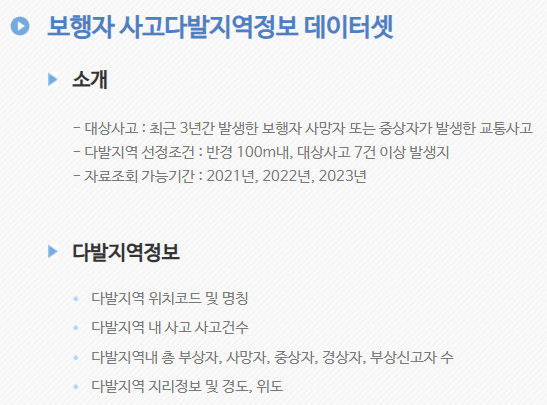

In [46]:
pedstrains

,사고다발지fid,사고다발지id,법정동코드,지점코드,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,6778887,2022040,1111017100,11110001,서울특별시 종로구1,서울특별시 종로구 명륜2가(성균관대입구교차로 부근),9,10,1,9,0,0,126.998780,37.582940,"{""type"":""Polygon"",""coordinates"":[[[126.9996779..."
1,6779548,2022040,1111013700,11110002,서울특별시 종로구2,서울특별시 종로구 낙원동(낙원상가 부근),8,8,0,8,0,0,126.988435,37.571899,"{""type"":""Polygon"",""coordinates"":[[[126.9893336..."
2,6779517,2022040,1111011900,11110003,서울특별시 종로구3,서울특별시 종로구 세종로(세종로180 부근),7,8,0,8,0,0,126.976899,37.569865,"{""type"":""Polygon"",""coordinates"":[[[126.9777971..."
3,6779511,2022040,1111017500,11110004,서울특별시 종로구4,서울특별시 종로구 숭인동(신설동역6번출구 부근),7,8,0,7,1,0,127.023747,37.575111,"{""type"":""Polygon"",""coordinates"":[[[127.0246448..."
4,6779131,2022040,1111013800,11110005,서울특별시 종로구5,서울특별시 종로구 종로2가(종로2가교차로 부근),7,8,0,7,0,1,126.987315,37.570091,"{""type"":""Polygon"",""coordinates"":[[[126.9882136..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,6932027,2024051,1171011300,11710005,서울 송파구5,서울 송파구 거여동(거여역교차로 부근),7,7,0,7,0,0,127.143926,37.492727,"{""type"":""Polygon"",""coordinates"":[[[127.1448244..."
1207,6931901,2024051,1171010100,11710006,서울 송파구6,서울 송파구 잠실동(잠실새내역교차로 부근),7,7,0,7,0,0,127.085227,37.511457,"{""type"":""Polygon"",""coordinates"":[[[127.0861255..."
1208,6932042,2024051,1174010800,11740001,서울 강동구1,서울 강동구 천호동(강동역 5호선 부근),7,7,0,7,0,0,127.132638,37.535638,"{""type"":""Polygon"",""coordinates"":[[[127.1335363..."
1209,6932068,2024051,1174010900,11740002,서울 강동구2,서울 강동구 천호동(상미어린이집 부근),7,7,0,7,0,0,127.133265,37.546337,"{""type"":""Polygon"",""coordinates"":[[[127.1341635..."


In [47]:
pedstrains['사고다발지fid'].is_unique

True

In [50]:
pedstrains.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 1210
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지fid  457 non-null    int64  
 1   사고다발지id   457 non-null    int64  
 2   법정동코드     457 non-null    int64  
 3   지점코드      457 non-null    int64  
 4   시도시군구명    457 non-null    object 
 5   지점명       457 non-null    object 
 6   사고건수      457 non-null    int64  
 7   사상자수      457 non-null    int64  
 8   사망자수      457 non-null    int64  
 9   중상자수      457 non-null    int64  
 10  경상자수      457 non-null    int64  
 11  부상신고자수    457 non-null    int64  
 12  경도        457 non-null    float64
 13  위도        457 non-null    float64
 14  다발지역폴리곤   457 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 57.1+ KB


In [49]:
count_col = ['사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수']

pedstrains[count_col].describe()

,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,7.956236,8.752735,0.304158,7.890591,0.490153,0.067834
std,1.653760,2.367108,0.547567,1.865270,1.152995,0.276638
min,7.000000,7.000000,0.000000,5.000000,0.000000,0.000000
25%,7.000000,7.000000,0.000000,7.000000,0.000000,0.000000
50%,7.000000,8.000000,0.000000,7.000000,0.000000,0.000000
75%,8.000000,9.000000,1.000000,9.000000,1.000000,0.000000
max,17.000000,31.000000,2.000000,17.000000,18.000000,2.000000


In [35]:
# import logging

# # logging 레벨 설정
# logging.getLogger('matplotlib').setLevel(logging.ERROR)


# fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(20,20))

# for i, feature in enumerate(count_col):
#   row = int(i/2)
#   col = i%2
#   sns.histplot(x=feature, data=pedstrains, ax=ax[row][col])

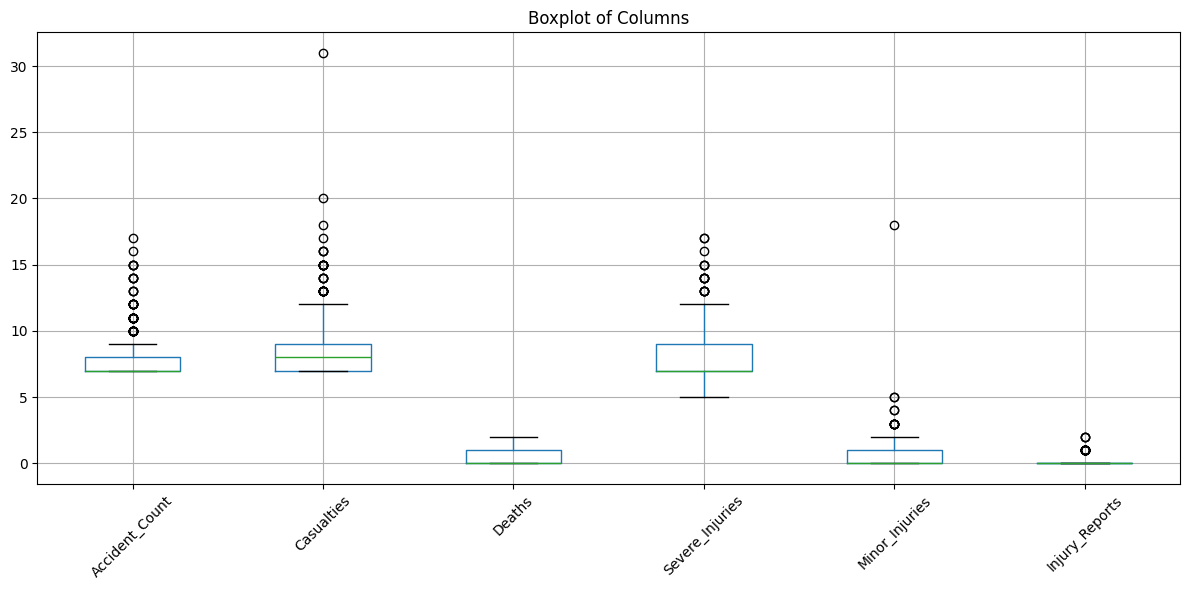

In [51]:
import logging

# logging 레벨 설정
logging.getLogger('matplotlib').setLevel(logging.ERROR)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to analyze
count_col = ['사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수']
count_col_eng = ['Accident_Count', 'Casualties', 'Deaths', 'Severe_Injuries', 'Minor_Injuries', 'Injury_Reports']

# 4. Boxplot to check distribution and outliers
plt.figure(figsize=(12, 6))
boxplot = pedstrains[count_col].boxplot()
plt.title('Boxplot of Columns')

# Set custom x-tick labels (English names)
plt.xticks(ticks=range(1, len(count_col) + 1), labels=count_col_eng, rotation=45)

plt.tight_layout()
plt.show()



### For all db

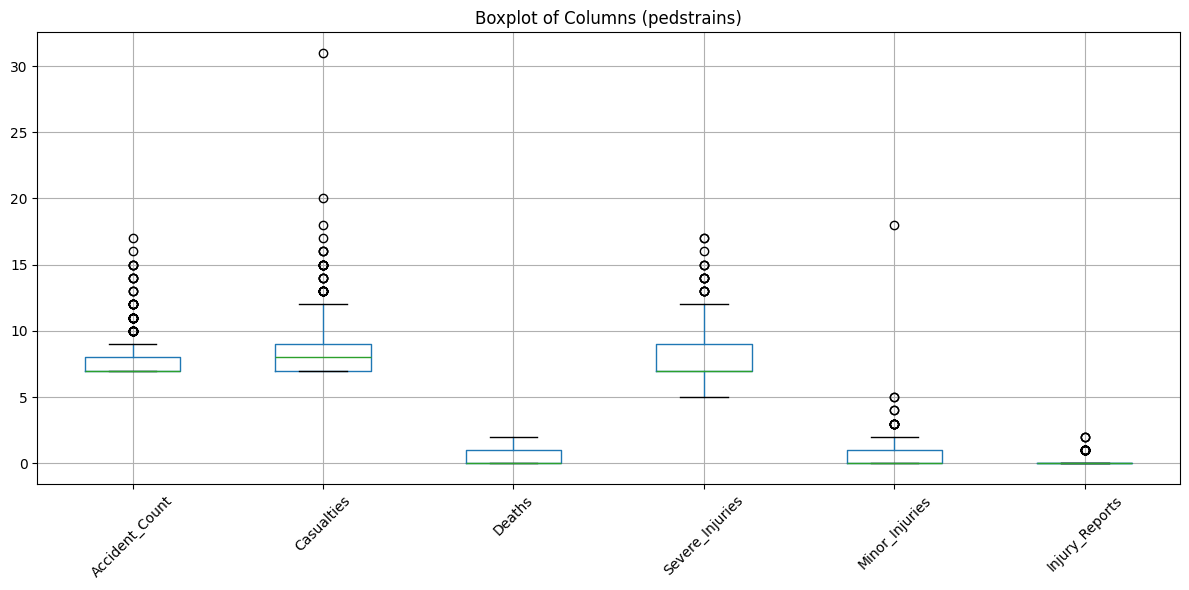

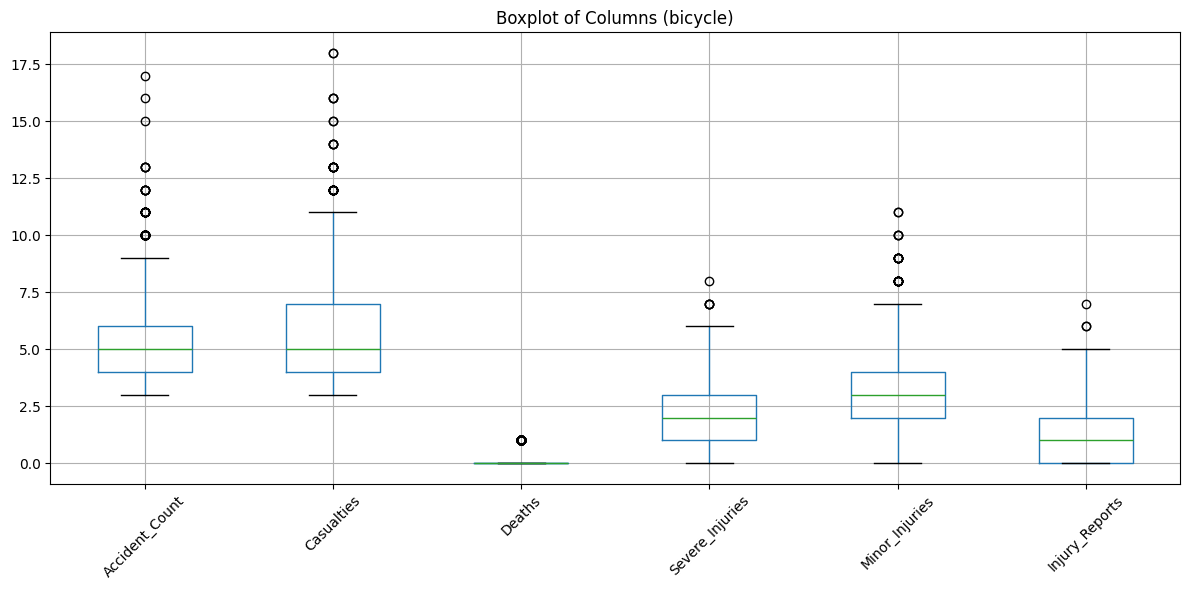

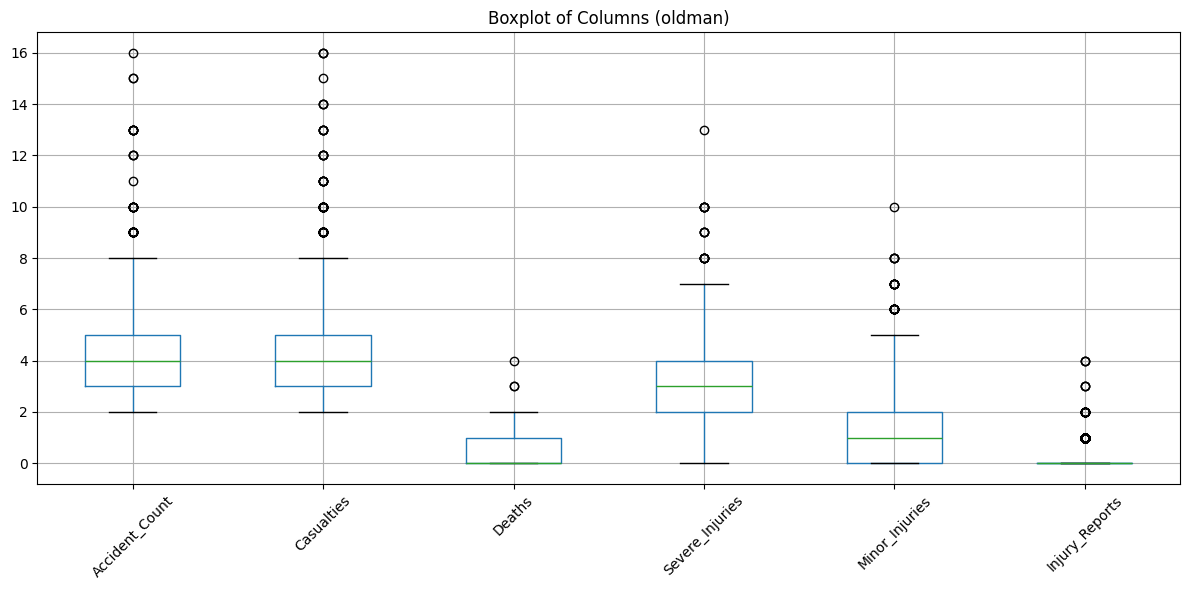

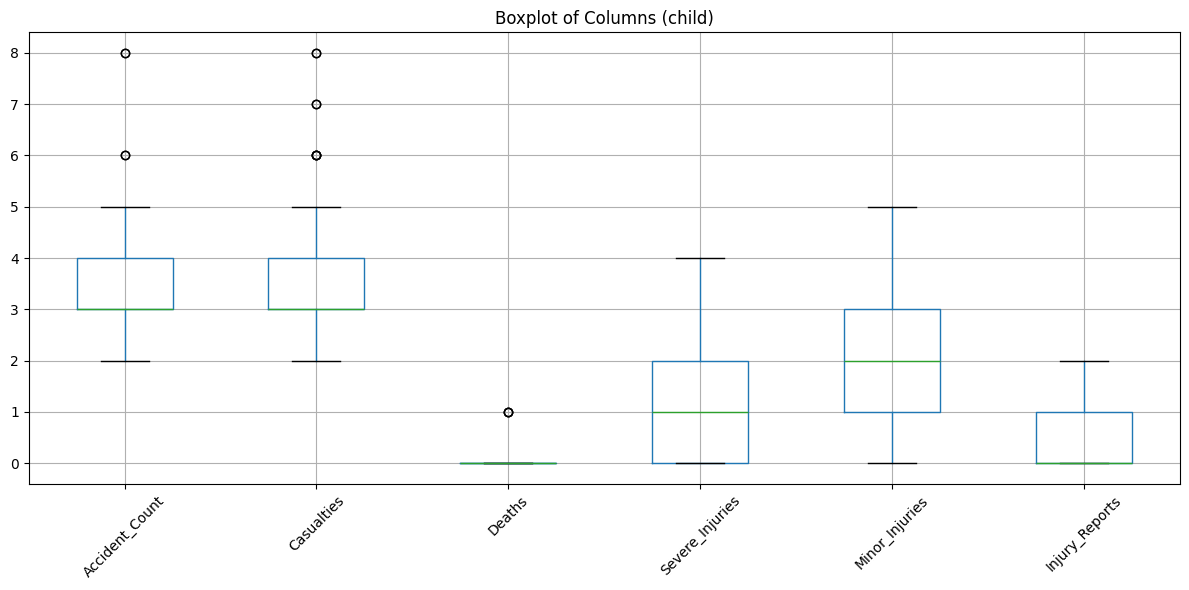

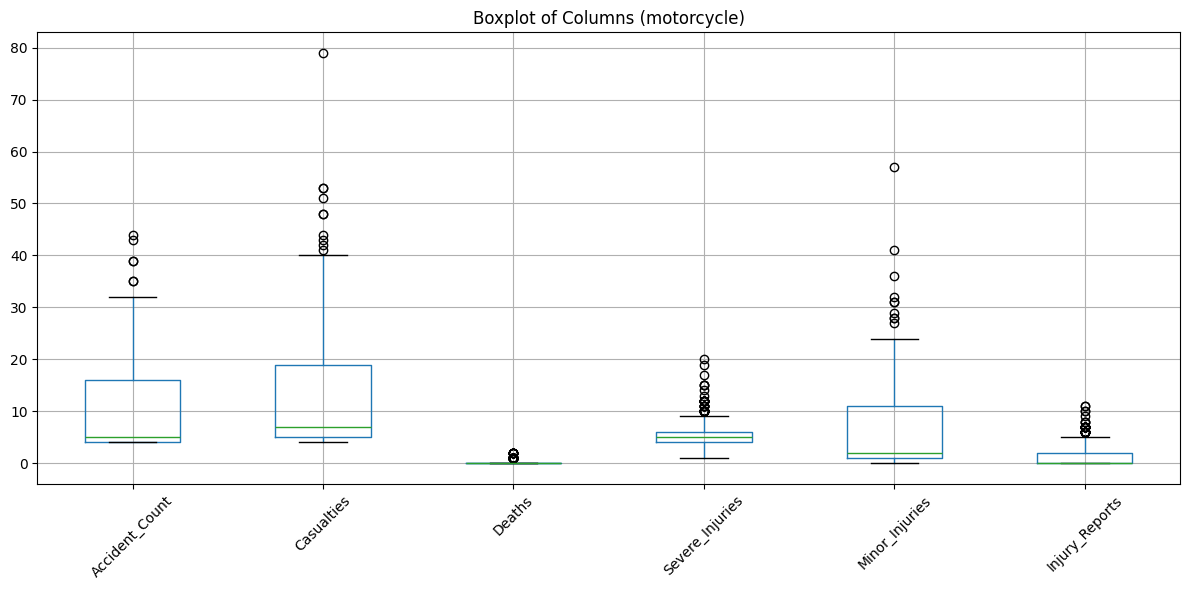

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to analyze
count_col = ['사고건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수']
count_col_eng = ['Accident_Count', 'Casualties', 'Deaths', 'Severe_Injuries', 'Minor_Injuries', 'Injury_Reports']


# 박스플롯 시각화
for api_name, df in seoul_dataframes.items():
    # 데이터프레임에 count_col이 존재하는지 확인
    if all(col in df.columns for col in count_col):
        plt.figure(figsize=(12, 6))

        # 박스플롯 생성
        df[count_col].boxplot()

        # 제목 설정 및 x축 레이블 영어로 변경
        plt.title(f'Boxplot of Columns ({api_name})')
        plt.xticks(ticks=range(1, len(count_col) + 1), labels=count_col_eng, rotation=45)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {api_name}: Required columns not found.")


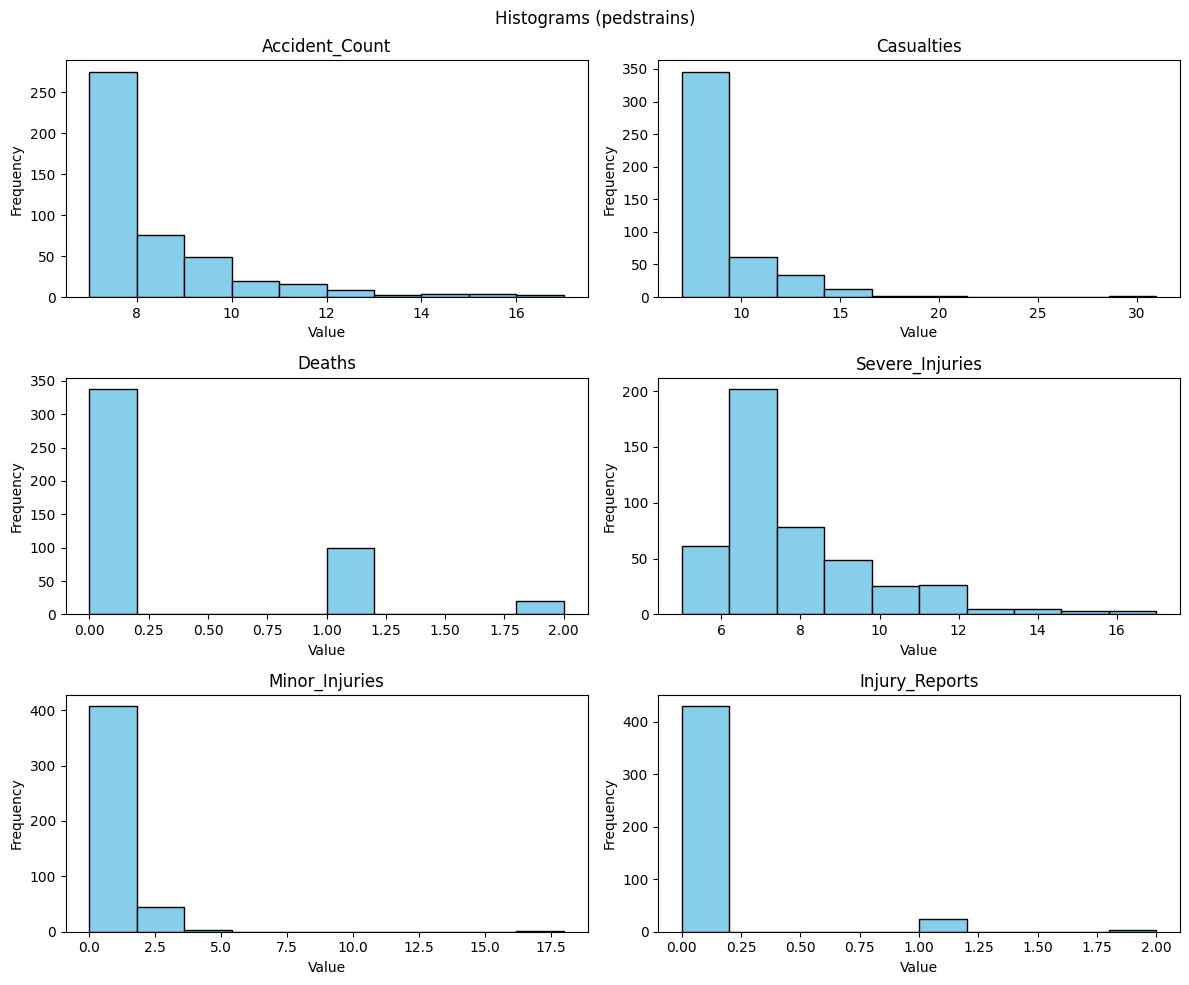

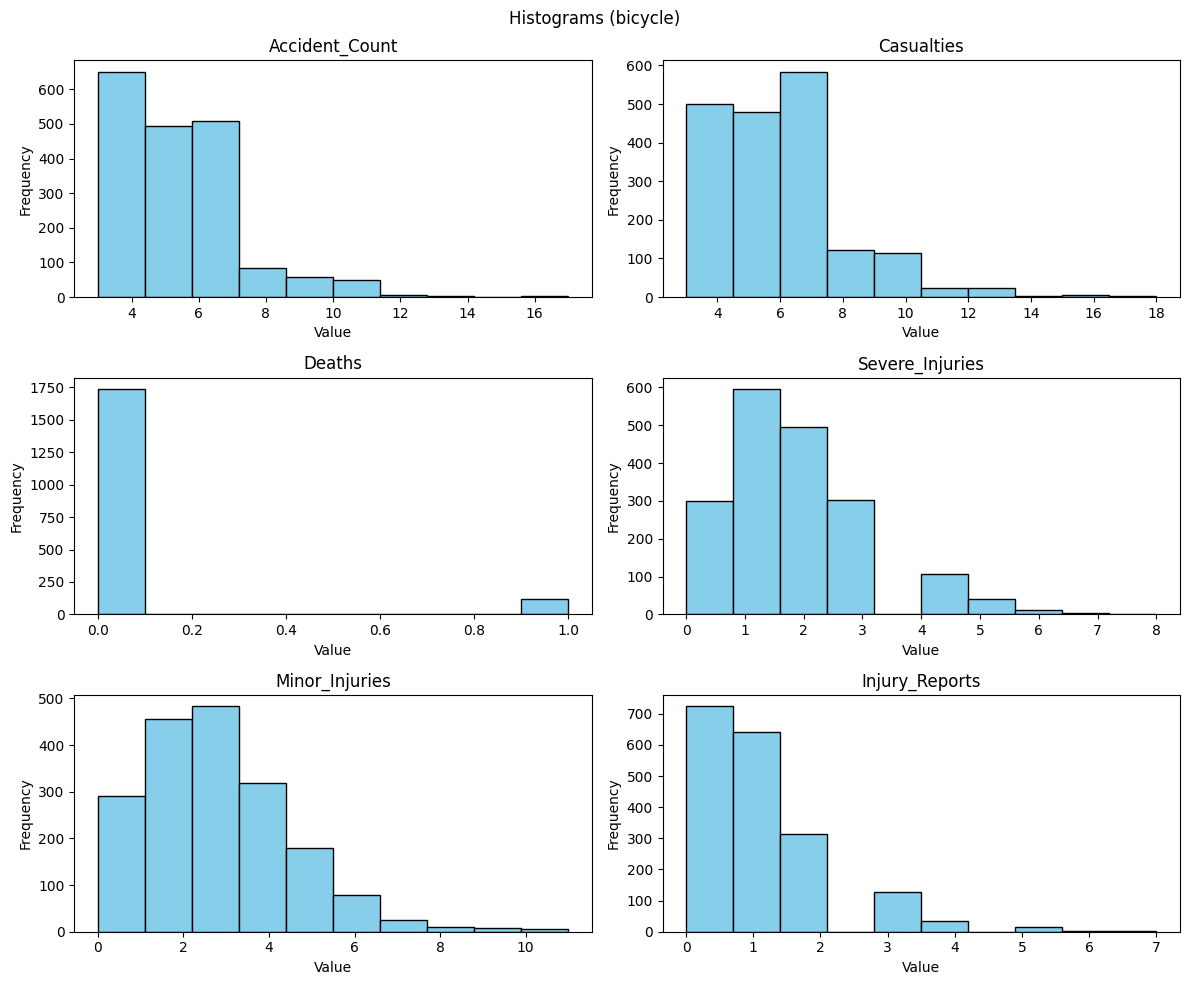

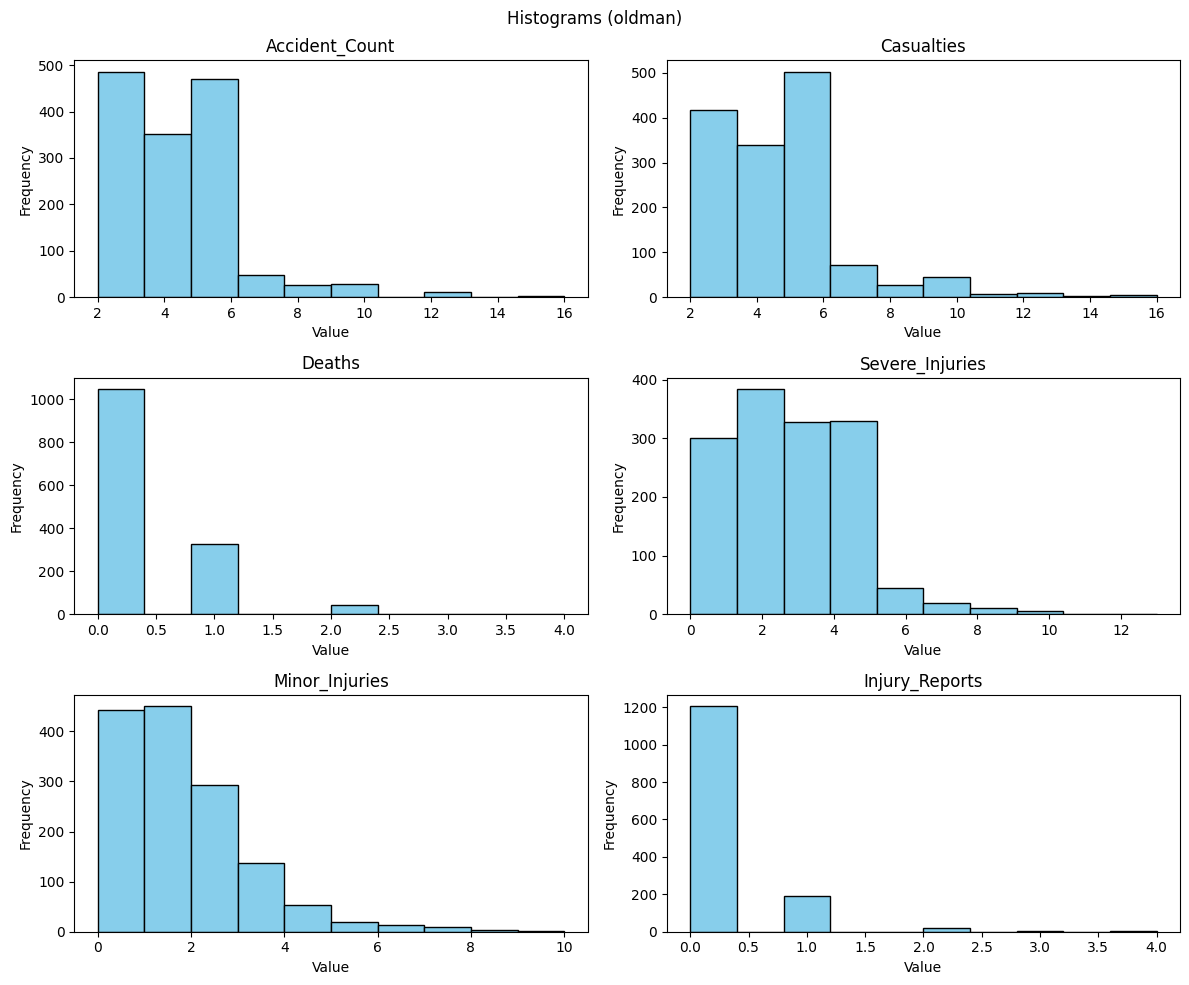

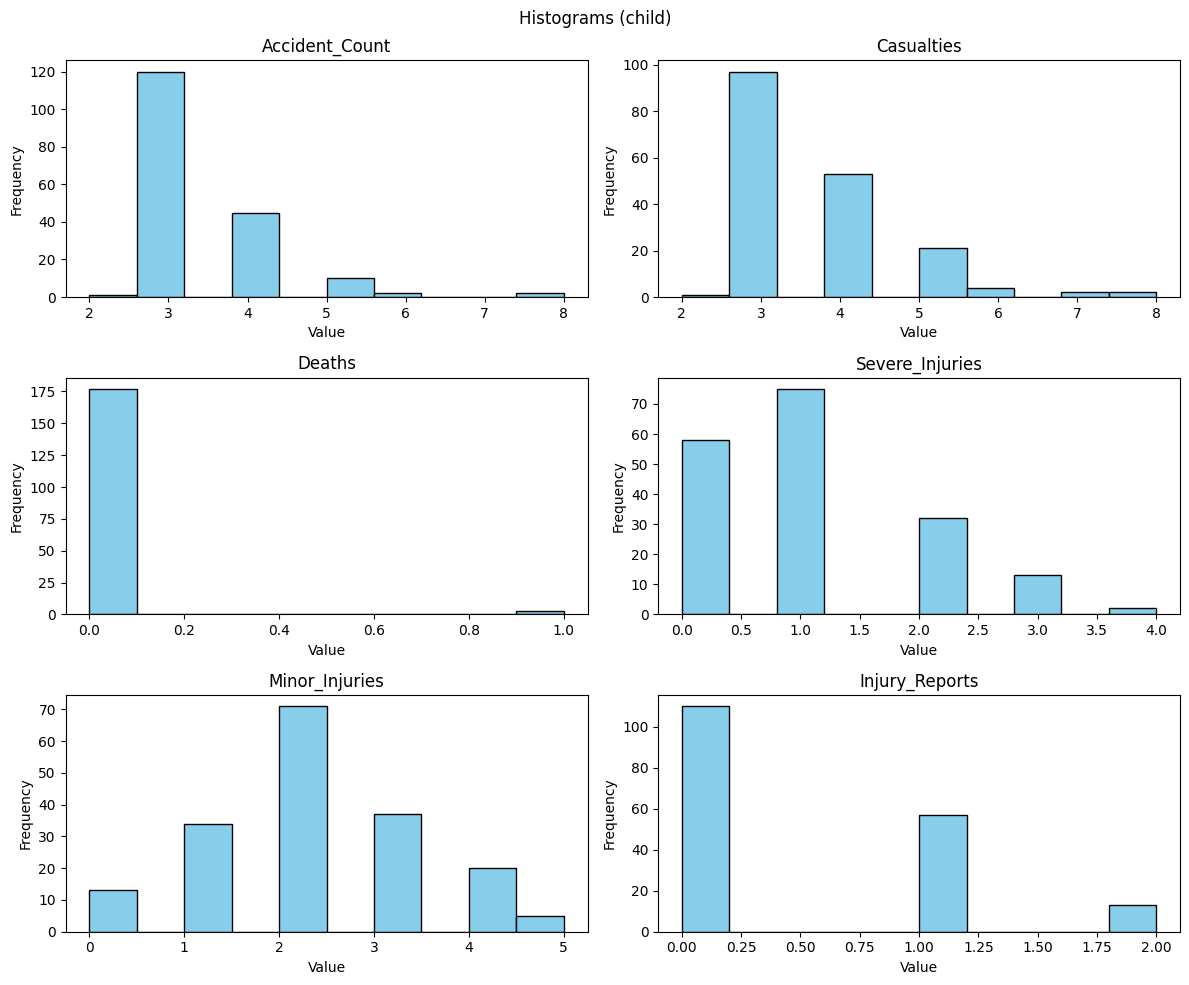

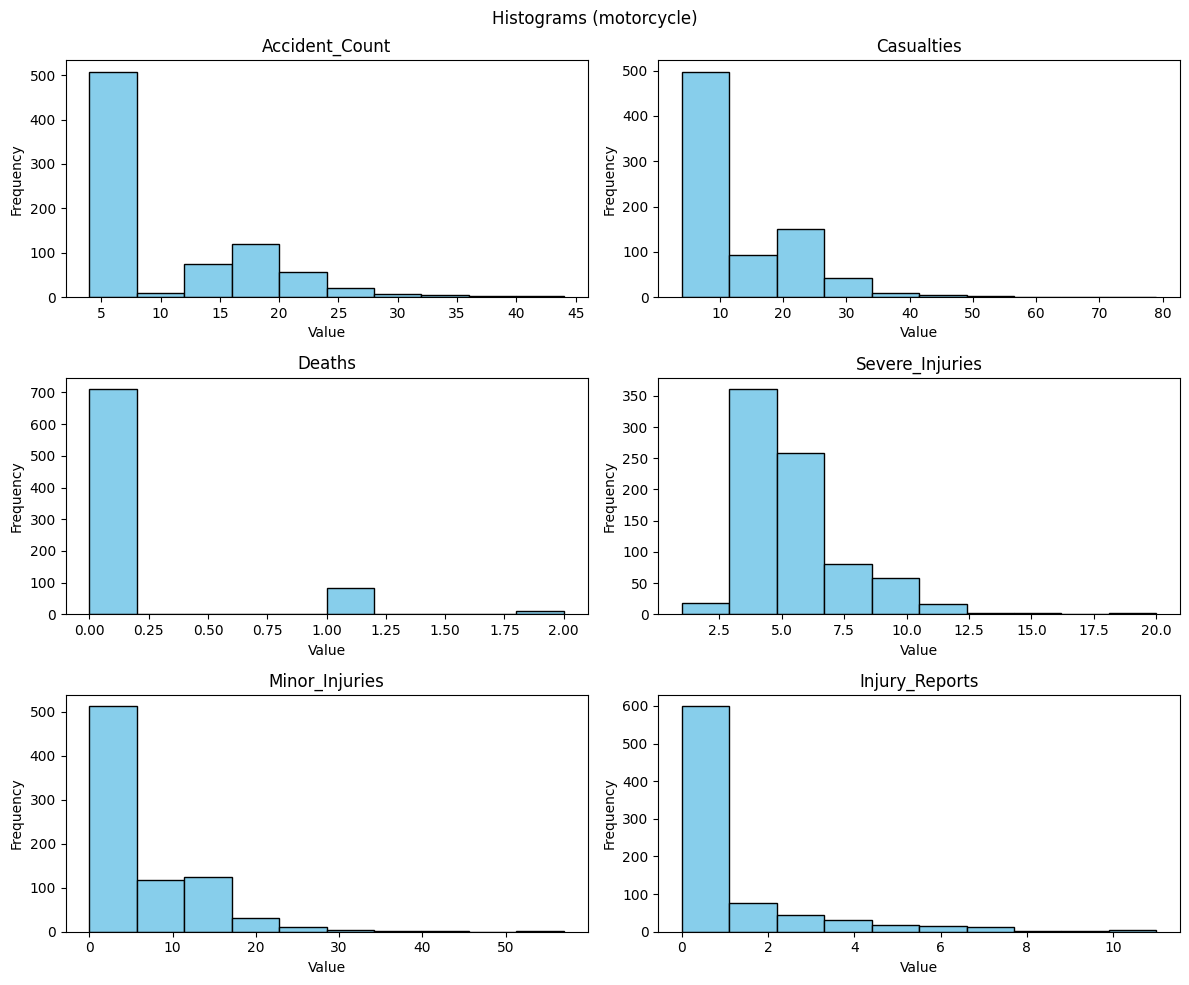

In [53]:
for api_name, df in seoul_dataframes.items():
    if all(col in df.columns for col in count_col):
        plt.figure(figsize=(12, 10))
        for i, col in enumerate(count_col):
            plt.subplot(3, 2, i + 1)
            plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
            plt.title(count_col_eng[i])
            plt.xlabel('Value')
            plt.ylabel('Frequency')
        plt.suptitle(f'Histograms ({api_name})')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nSkipping {api_name}: Required columns not found.")


### 위도, 경도 와 지점명 매칭 확인

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import time

# # Step 1: CSV 파일 읽기
# file_path = '19_23_pedstrians.csv'  # Colab에 업로드한 파일 경로
# pedstrains = pd.read_csv(file_path, encoding='cp949')

# # Step 2: Geopy 설치 및 초기화 (Colab 환경에서는 설치 필요)
# !pip install geopy
geolocator = Nominatim(user_agent="location_verification")

# Step 3: 위도, 경도 일치 여부 확인 함수 정의
def verify_location(row):
    try:
        # 지점명으로 지오코딩 시도
        location = geolocator.geocode(row['지점명'])
        time.sleep(1)  # API 호출 간 딜레이 추가 (Rate Limit 방지)

        if location:
            # 기존 위도, 경도와 지오코딩 결과 비교
            lat_diff = abs(location.latitude - row['위도'])
            lon_diff = abs(location.longitude - row['경도'])

            # 0.01 이내 차이를 허용 (약 1km 이내)
            return lat_diff < 0.01 and lon_diff < 0.01
        return False  # 지오코딩 실패 시 False 반환
    except Exception as e:
        print(f"Error processing {row['지점명']}: {e}")
        return False

# Step 4: 샘플 데이터 검증 (전체 데이터 사용 시 pedstrains.apply로 변경 가능)
results = pedstrains.head(10).apply(verify_location, axis=1)

# Step 5: 결과 출력
print("위치 일치 결과:")
print(results)
print("\n일치율:", results.mean() * 100, "%")


위치 일치 결과:
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

일치율: 0.0 %


In [ ]:
import folium

# 지도 중심점 설정 (폴리곤의 대략적인 중심)
center = [37.582940, 126.998780]

# 지도 생성
map = folium.Map(location=center, zoom_start=16)


# 폴리곤 스타일 설정 및 지도에 추가
folium.GeoJson(
    pedstrains.iloc[0,-1],
    style_function=lambda x: {
        'fillColor': 'blue',  # 내부 색상
        'color': 'red',       # 외곽선 색상
        'weight': 2,          # 외곽선 두께
        'fillOpacity': 0.3    # 내부 색상의 투명도
    }
).add_to(map)

map
# # 지도 저장 (HTML 파일로 저장)
# map.save('polygon_map.html')

# print("지도가 성공적으로 생성되었습니다! 'polygon_map.html' 파일을 확인하세요.")
